In [ ]:
import os
import shutil

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
# Original Data Path
original_dataset_dir = './Datasets/train'

# Small Dataset Path
base_dir = './Datasets/cats_and_dogs_small'

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [ ]:
# Train Validation, Test data
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats)
os.mkdir(validation_dogs)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [ ]:
# file copy

#fnames = []
#for i in range(1000):
    #filename = 'cat.{}.jpg'.format(i)
    #fnames.append(filename)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)     # 원본 경로
    dst = os.path.join(train_cats_dir, fname)           # 복사할 경로
    
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)     # 원본 경로
    dst = os.path.join(train_dogs_dir, fname)           # 복사할 경로
    
    shutil.copyfile(src, dst)

print('copy completed')
    


copy completed


In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)         # 원본 경로
    dst = os.path.join(validation_cats_dir, fname)          # 복사할 경로
    
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)         # 원본 경로
    dst = os.path.join(validation_dogs_dir, fname)          # 복사할 경로
    
    shutil.copyfile(src, dst)

print('copy completed')

copy completed


In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)         # 원본 경로
    dst = os.path.join(test_cats_dir, fname)                # 복사할 경로
    
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)         # 원본 경로
    dst = os.path.join(test_dogs_dir, fname)                # 복사할 경로
    
    shutil.copyfile(src, dst)

print('copy completed')

copy completed


In [ ]:
print('Train cat images         :', len(os.listdir(train_cats_dir)))
print('Train dog images         :', len(os.listdir(train_dogs_dir)))
print()
print('Validation cat images    :', len(os.listdir(validation_cats_dir)))
print('Validation dog images    :', len(os.listdir(validation_dogs_dir)))
print()
print('Test cat images          :', len(os.listdir(test_cats_dir)))
print('Test dog images          :', len(os.listdir(test_dogs_dir)))

Train cat images         : 1000
Train dog images         : 1000

Validation cat images    : 500
Validation dog images    : 500

Test cat images          : 500
Test dog images          : 500


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model  = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [ ]:
# Data Preprocessing 데이터 전처리 

# Image Scaling 이미지 크기 맞추기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size=20, class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = (150,150), batch_size=20, class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator

In [ ]:
# for data_batch, labels_batch in train_generator:
    #print('Batch Data Size: ', data_batch.shape)
    #print('Batch Label Size: ', labels_batch.shape)
    #break

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = validation_generator, validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 66s 659ms/step - loss: 0.7434 - accuracy: 0.5185 - val_loss: 0.6954 - val_accuracy: 0.5120
Epoch 2/30
100/100 [==============================] - 59s 594ms/step - loss: 0.6932 - accuracy: 0.5715 - val_loss: 0.6748 - val_accuracy: 0.6010
Epoch 3/30
100/100 [==============================] - 59s 591ms/step - loss: 0.6752 - accuracy: 0.6220 - val_loss: 0.8383 - val_accuracy: 0.5220
Epoch 4/30
100/100 [==============================] - 59s 593ms/step - loss: 0.6163 - accuracy: 0.6740 - val_loss: 0.6491 - val_accuracy: 0.6240
Epoch 5/30
100/100 [==============================] - 59s 594ms/step - loss: 0.5551 - accuracy: 0.7180 - val_loss: 0.6111 - val_accuracy: 0.6880
Epoch 6/30
100/100 [==============================] - 59s 594ms/step - loss: 0.4986 - accuracy: 0.7500 - val_loss: 0.6341 - val_accuracy: 0.6870
Epoch 7/30
100/100 [==============================] - 60s 600ms/step - loss: 0.4549 - accuracy: 0.7820 - val_loss: 0.6549 - val_ac

In [ ]:
model.save('cats_and_dogs_small_1.0.h5')

In [ ]:
import matplotlib.pyplot as plt

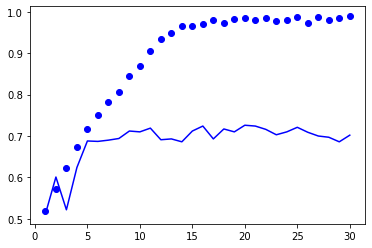

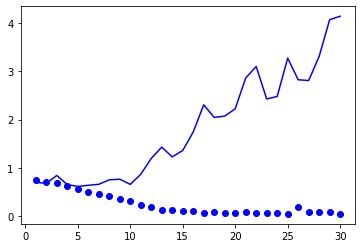

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b-', label = 'Validation accuracy')
plt.title = ('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b-', label = 'Validation loss')
plt.title = ('Training and validation accuracy')

In [ ]:
datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

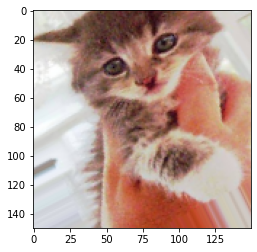

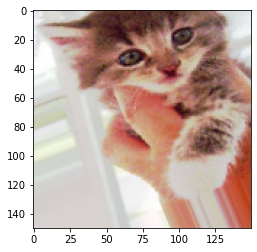

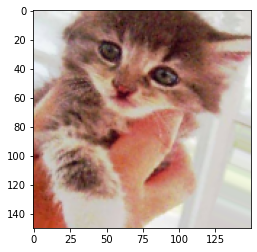

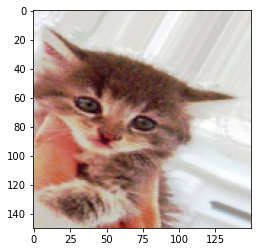

In [ ]:
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]
img = image.load_img(img_path, target_size = (150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(    rescale=1./255,    rotation_range=40,    width_shift_range=0.2,    height_shift_range=0.2,    shear_range=0.2,    zoom_range=0.2,    horizontal_flip=True,)
# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,        
# 모든 이미지를 150 × 150 크기로 바꿉니다        
target_size=(150, 150),        batch_size=32,        
# binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다        
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(        validation_dir,        target_size=(150, 150),        batch_size=32,        class_mode='binary')
history = model.fit_generator(      train_generator,      steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
 63/100 [=================>............] - 64s 1s/step - loss: 0.9005 - accuracy: 0.5755 - val_loss: 0.6706 - val_accuracy: 0.5810
